<a href="https://colab.research.google.com/github/Vasugi2003/CHRONIC-DISEASE-PREDICTION-USING-MACHINE-LEARNING/blob/main/Chronic_disease_prediction_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Plotting Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import xgboost as xgb


data = pd.read_csv('/content/kidney_disease.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
data.iloc[0:5,0:20]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no


In [ ]:
data.classification.unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [ ]:
data.classification=data.classification.replace("ckd\t","ckd")

In [ ]:
data.classification.unique()

array(['ckd', 'notckd'], dtype=object)

In [ ]:
data.drop('id', axis = 1, inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [ ]:
data.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
df = data.dropna(axis = 0)
print(f"Before dropping all NaN values: {data.shape}")
print(f"After dropping all NaN values: {df.shape}")

Before dropping all NaN values: (400, 25)
After dropping all NaN values: (158, 25)


In [ ]:
df.index = range(0,len(df),1)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
1,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd
2,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,...,32,4500,3.8,yes,yes,no,poor,yes,no,ckd
3,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,...,16,11000,2.6,yes,yes,yes,poor,yes,no,ckd
4,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,ckd


In [ ]:
df.wc.unique()

array(['6700', '12100', '4500', '11000', '9200', '6900', '9600', '18900',
       '7200', '14600', '6400', '\t6200', '3800', '9800', '12500', '5600',
       '7000', '15200', '5000', '16300', '\t8400', '10500', '7900',
       '10900', '12800', '12400', '19100', '7500', '16700', '26400',
       '8800', '7400', '12000', '15700', '11500', '10200', '5400',
       '10400', '9100', '6200', '8300', '10700', '8400', '4300', '9400',
       '8600', '6800', '9500', '9000', '4700', '6300', '5800', '5500',
       '5300', '7100', '8200', '8100', '7800', '7300', '7700', '9900',
       '5200', '6000', '10300', '9300', '6500', '8000', '9700', '5100',
       '5700', '6600'], dtype=object)

In [ ]:
df['wc'].unique()

array(['6700', '12100', '4500', '11000', '9200', '6900', '9600', '18900',
       '7200', '14600', '6400', '\t6200', '3800', '9800', '12500', '5600',
       '7000', '15200', '5000', '16300', '\t8400', '10500', '7900',
       '10900', '12800', '12400', '19100', '7500', '16700', '26400',
       '8800', '7400', '12000', '15700', '11500', '10200', '5400',
       '10400', '9100', '6200', '8300', '10700', '8400', '4300', '9400',
       '8600', '6800', '9500', '9000', '4700', '6300', '5800', '5500',
       '5300', '7100', '8200', '8100', '7800', '7300', '7700', '9900',
       '5200', '6000', '10300', '9300', '6500', '8000', '9700', '5100',
       '5700', '6600'], dtype=object)

In [ ]:
df['wc']=df['wc'].replace(["\t6200","\t8400"],[6200,8400])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['wc'].unique()

array(['6700', '12100', '4500', '11000', '9200', '6900', '9600', '18900',
       '7200', '14600', '6400', 6200, '3800', '9800', '12500', '5600',
       '7000', '15200', '5000', '16300', 8400, '10500', '7900', '10900',
       '12800', '12400', '19100', '7500', '16700', '26400', '8800',
       '7400', '12000', '15700', '11500', '10200', '5400', '10400',
       '9100', '6200', '8300', '10700', '8400', '4300', '9400', '8600',
       '6800', '9500', '9000', '4700', '6300', '5800', '5500', '5300',
       '7100', '8200', '8100', '7800', '7300', '7700', '9900', '5200',
       '6000', '10300', '9300', '6500', '8000', '9700', '5100', '5700',
       '6600'], dtype=object)

In [ ]:
df['pcv']=df['pcv'].astype(int)
df['wc']=df['wc'].astype(int)
df['rc']=df['rc'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 3 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             158 non-null    float64
 1   bp              158 non-null    float64
 2   sg              158 non-null    float64
 3   al              158 non-null    float64
 4   su              158 non-null    float64
 5   rbc             158 non-null    object 
 6   pc              158 non-null    object 
 7   pcc             158 non-null    object 
 8   ba              158 non-null    object 
 9   bgr             158 non-null    float64
 10  bu              158 non-null    float64
 11  sc              158 non-null    float64
 12  sod             158 non-null    float64
 13  pot             158 non-null    float64
 14  hemo            158 non-null    float64
 15  pcv             158 non-null    int64  
 16  wc              158 non-null    int64  
 17  rc              158 non-null    flo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
object_dtypes = df.select_dtypes(include = 'object')
object_dtypes.head()

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
9,abnormal,abnormal,present,notpresent,yes,yes,no,poor,no,yes,ckd
11,abnormal,abnormal,present,notpresent,yes,yes,no,poor,yes,no,ckd
14,normal,abnormal,present,present,yes,yes,yes,poor,yes,no,ckd
20,abnormal,abnormal,notpresent,notpresent,yes,yes,yes,poor,yes,yes,ckd


In [ ]:
dictonary = {
        "rbc": {
        "abnormal":1,
        "normal": 0,
    },
        "pc":{
        "abnormal":1,
        "normal": 0,
    },
        "pcc":{
        "present":1,
        "notpresent":0,
    },
        "ba":{
        "notpresent":0,
        "present": 1,
    },
        "htn":{
        "yes":1,
        "no": 0,
    },
        "dm":{
        "yes":1,
        "no":0,
    },
        "cad":{
        "yes":1,
        "no": 0,
    },
        "appet":{
        "good":1,
        "poor": 0,
    },
        "pe":{
        "yes":1,
        "no":0,
    },
        "ane":{
        "yes":1,
        "no":0,
    }
}

In [ ]:
df=df.replace(dictonary)

In [ ]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,48.0,70.0,1.005,4.0,0.0,0,1,1,0,117.0,...,32,6700,3.9,1,0,0,0,1,1,ckd
9,53.0,90.0,1.020,2.0,0.0,1,1,1,0,70.0,...,29,12100,3.7,1,1,0,0,0,1,ckd
11,63.0,70.0,1.010,3.0,0.0,1,1,1,0,380.0,...,32,4500,3.8,1,1,0,0,1,0,ckd
14,68.0,80.0,1.010,3.0,2.0,0,1,1,1,157.0,...,16,11000,2.6,1,1,1,0,1,0,ckd
20,61.0,80.0,1.015,2.0,0.0,1,1,0,0,173.0,...,24,9200,3.2,1,1,1,0,1,1,ckd


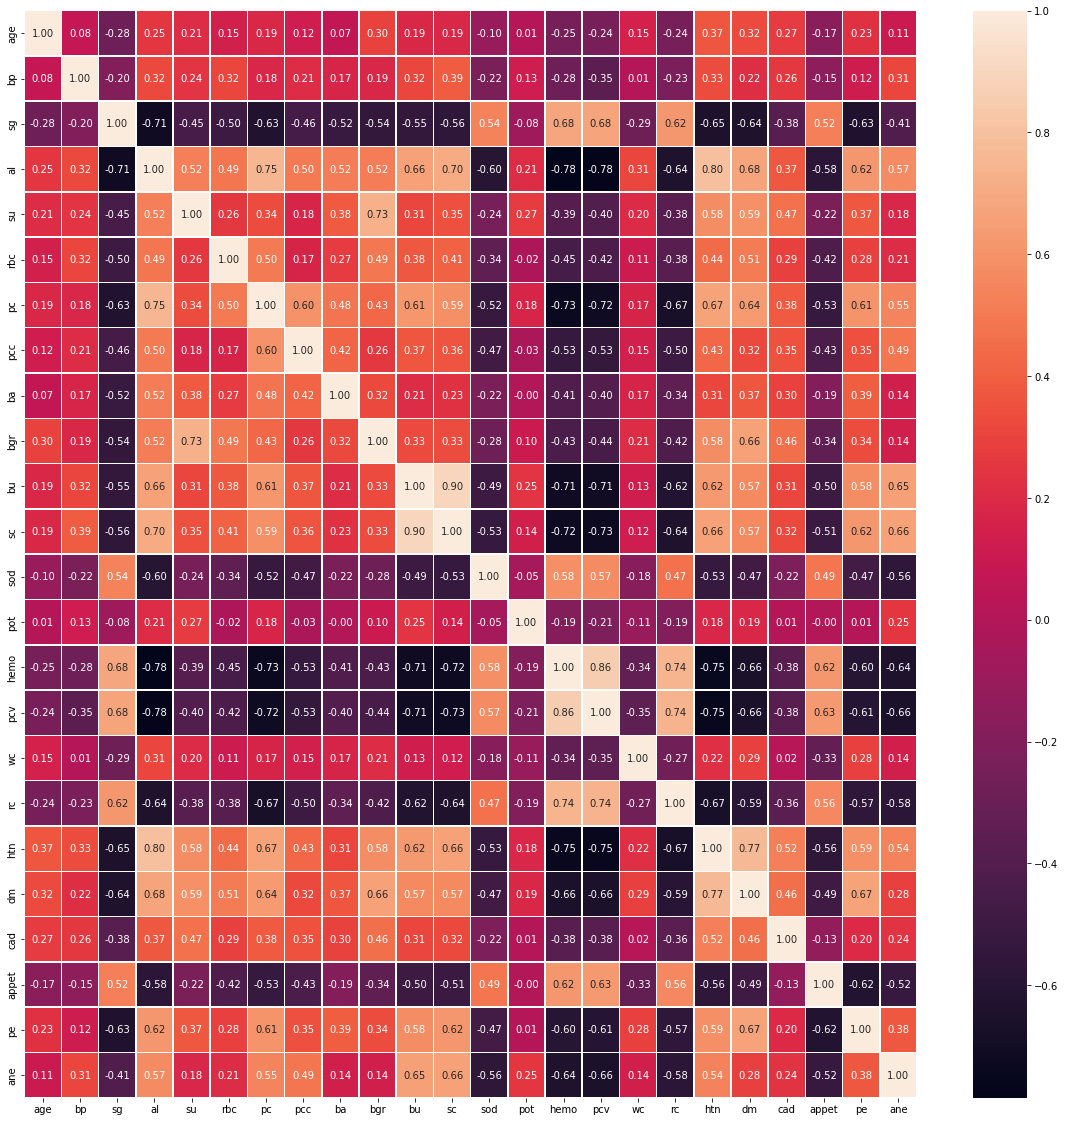

In [ ]:
import seaborn as sns
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True, fmt=".2f",linewidths=0.5)

In [ ]:
df.corr()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
age,1.000000,0.079712,-0.277303,0.253380,0.207711,0.147971,0.188907,0.124032,0.068353,0.301915,...,-0.245645,-0.235116,0.153132,-0.242235,0.372348,0.323957,0.269868,-0.170259,0.232327,0.105809
bp,0.079712,1.000000,-0.198897,0.322507,0.243828,0.316670,0.179834,0.206507,0.174555,0.190113,...,-0.282365,-0.353504,0.008274,-0.228533,0.334951,0.218096,0.257709,-0.145047,0.117878,0.311097
sg,-0.277303,-0.198897,1.000000,-0.712331,-0.448477,-0.500494,-0.630323,-0.460050,-0.516392,-0.544781,...,0.682086,0.678472,-0.288930,0.619092,-0.648168,-0.639391,-0.379305,0.523944,-0.633622,-0.413252
al,0.253380,0.322507,-0.712331,1.000000,0.521448,0.489941,0.752956,0.503341,0.516104,0.518123,...,-0.784745,-0.775528,0.314574,-0.640099,0.796876,0.678582,0.374755,-0.578080,0.622268,0.569529
su,0.207711,0.243828,-0.448477,0.521448,1.000000,0.256568,0.335901,0.177327,0.381929,0.730050,...,-0.385511,-0.404821,0.201000,-0.377726,0.577286,0.591010,0.466658,-0.220547,0.374128,0.179811
rbc,0.147971,0.316670,-0.500494,0.489941,0.256568,1.000000,0.498959,0.168592,0.273177,0.493857,...,-0.452566,-0.422537,0.108857,-0.379378,0.442400,0.511777,0.293269,-0.418639,0.282868,0.209797
pc,0.188907,0.179834,-0.630323,0.752956,0.335901,0.498959,1.000000,0.600092,0.481227,0.430646,...,-0.733140,-0.718042,0.169936,-0.667113,0.666767,0.636288,0.384223,-0.528435,0.606234,0.545380
pcc,0.124032,0.206507,-0.460050,0.503341,0.177327,0.168592,0.600092,1.000000,0.415033,0.257768,...,-0.531182,-0.534564,0.146742,-0.499401,0.432876,0.321900,0.352255,-0.432515,0.350171,0.485941
ba,0.068353,0.174555,-0.516392,0.516104,0.381929,0.273177,0.481227,0.415033,1.000000,0.318095,...,-0.410353,-0.397500,0.170071,-0.343299,0.314961,0.367477,0.297063,-0.187815,0.393819,0.141344
bgr,0.301915,0.190113,-0.544781,0.518123,0.730050,0.493857,0.430646,0.257768,0.318095,1.000000,...,-0.434158,-0.443818,0.212093,-0.418085,0.579407,0.663012,0.459164,-0.338924,0.336141,0.139854


In [ ]:
X = df.drop(['classification', 'sg', 'appet', 'rc', 'pcv', 'hemo', 'sod'], axis = 1)
y = df['classification']

In [ ]:
X.columns

Index(['age', 'bp', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc',
       'pot', 'wc', 'htn', 'dm', 'cad', 'pe', 'ane'],
      dtype='object')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.svm import SVC
from sklearn import svm

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.9, random_state = 42)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
# Predict Output
rf_predicted = random_forest.predict(X_test)

random_forest_score = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_score_test = round(random_forest.score(X_test, y_test) * 100, 2)
print('Random Forest Score: \n', random_forest_score)
print('Random Forest Test Score: \n', random_forest_score_test)
print('Accuracy: \n', accuracy_score(y_test,rf_predicted))
print(confusion_matrix(y_test,rf_predicted))
print(classification_report(y_test,rf_predicted))

Random Forest Score: 
 100.0
Random Forest Test Score: 
 88.81
Accuracy: 
 0.8881118881118881
[[ 25  16]
 [  0 102]]
              precision    recall  f1-score   support

         ckd       1.00      0.61      0.76        41
      notckd       0.86      1.00      0.93       102

    accuracy                           0.89       143
   macro avg       0.93      0.80      0.84       143
weighted avg       0.90      0.89      0.88       143



In [ ]:
logreg = LogisticRegression()

# Train the model using the training sets and check score
logreg.fit(X_train, y_train)

# Predict Output
log_predicted= logreg.predict(X_test)

logreg_score = round(logreg.score(X_train, y_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test, y_test) * 100, 2)

# Equation coefficient and Intercept
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)

print('Accuracy: \n', accuracy_score(y_test,log_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,log_predicted))
print('Classification Report: \n', classification_report(y_test,log_predicted))

Logistic Regression Training Score: 
 100.0
Logistic Regression Test Score: 
 86.71
Accuracy: 
 0.8671328671328671
Confusion Matrix: 
 [[32  9]
 [10 92]]
Classification Report: 
               precision    recall  f1-score   support

         ckd       0.76      0.78      0.77        41
      notckd       0.91      0.90      0.91       102

    accuracy                           0.87       143
   macro avg       0.84      0.84      0.84       143
weighted avg       0.87      0.87      0.87       143



In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
# Predict Output
gauss_predicted = gaussian.predict(X_test)

gauss_score = round(gaussian.score(X_train, y_train) * 100, 2)
gauss_score_test = round(gaussian.score(X_test, y_test) * 100, 2)
print('Gaussian Score: \n', gauss_score)
print('Gaussian Test Score: \n', gauss_score_test)
print('Accuracy: \n', round(accuracy_score(y_test, gauss_predicted)*100,2)
print(confusion_matrix(y_test,gauss_predicted))
print(classification_report(y_test,gauss_predicted))

Gaussian Score: 
 100.0
Gaussian Test Score: 
 97.9
Accuracy: 
 0.9790209790209791
[[ 38   3]
 [  0 102]]
              precision    recall  f1-score   support

         ckd       1.00      0.93      0.96        41
      notckd       0.97      1.00      0.99       102

    accuracy                           0.98       143
   macro avg       0.99      0.96      0.97       143
weighted avg       0.98      0.98      0.98       143



In [ ]:
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_model_score = round(svm_model.score(X_train, y_train) * 100, 2)
Y_predict = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test,Y_predict)*100
print("Accuracy:",svm_accuracy)
cm = confusion_matrix(y_test,Y_predict)
print("Confusion Matrix is :", cm)

Accuracy: 95.1048951048951
Confusion Matrix is : [[ 34   7]
 [  0 102]]


In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
knn = KNeighborsClassifier()

params = {
    "n_neighbors":[3,5,7,9],
    "weights":["uniform","distance"],
    "algorithm":["ball_tree","kd_tree","brute"],
    "leaf_size":[25,30,35],
    "p":[1,2]
}

gs = GridSearchCV(knn, param_grid=params)
knn_model = gs.fit(X_train,y_train)

knn_model_score = round(knn_model.score(X_train, y_train) * 100, 2)
Y_predict = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test,Y_predict)*100
print("Accuracy:",knn_accuracy)
cm = confusion_matrix(y_test,Y_predict)
print("Confusion Matrix is :", cm)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


Accuracy: 71.32867132867133
Confusion Matrix is : [[  0  41]
 [  0 102]]


In [ ]:
#Comparing all the models
models = pd.DataFrame({
    'Model': [ 'Logistic Regression', 'Gaussian Naive Bayes','Random Forest','SVM Model', "KNN"],
    'Score': [ logreg_score, gauss_score, random_forest_score,svm_model_score,knn_model_score],
    'Test Score': [ logreg_score_test, gauss_score_test, random_forest_score_test,svm_accuracy,knn_accuracy]})
models.sort_values(by='Test Score', ascending=False)

,Model,Score,Test Score
1,Gaussian Naive Bayes,100.00,97.900000
3,SVM Model,100.00,95.104895
2,Random Forest,100.00,91.610000
0,Logistic Regression,100.00,86.710000
4,KNN,86.67,71.328671
